In [1]:
// Import Apollo Client core components via esm.sh for Deno compatibility
import { ApolloClient, InMemoryCache, HttpLink } from 'https://esm.sh/@apollo/client/core?pin=v3.9.9';

// Define the GraphQL endpoint
const graphqlUri = 'https://incidentdatabase.ai/api/graphql';

// Create the Apollo Client instance
const client = new ApolloClient({
  link: new HttpLink({ uri: graphqlUri }),
  cache: new InMemoryCache(),
  // It's often helpful to disable caching in notebook environments for fresh data
  defaultOptions: {
    watchQuery: { fetchPolicy: 'no-cache' },
    query: { fetchPolicy: 'no-cache' },
  },
});

In [2]:
// Import gql tag for defining GraphQL queries
import { gql } from 'https://esm.sh/@apollo/client/core?pin=v3.9.9';

// Define the GraphQL query to fetch report dates
const GET_REPORT_DATES = gql`
  query GetReportDates {
    reports {
      report_number
      date_published
    }
  }
`;

const { data: { reports: reportData }, error } = await client.query({
  query: GET_REPORT_DATES,
});

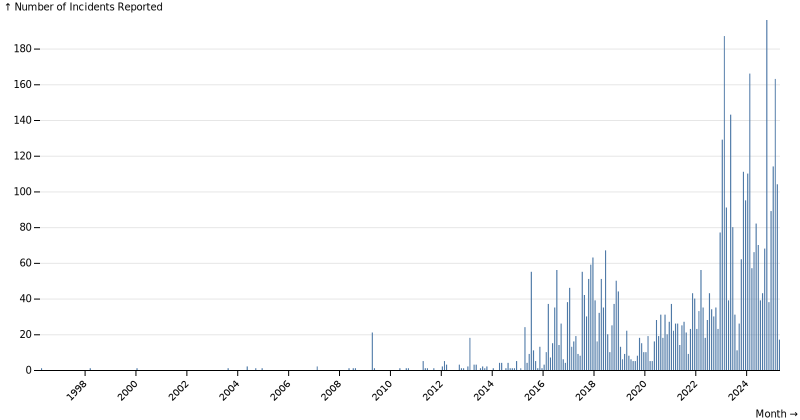

In [3]:
// Import Observable Plot via esm.sh
import * as Plot from "https://esm.sh/@observablehq/plot";
// Import the document helper for Deno/Jupyter rendering
import { document } from "jsr:@manzt/jupyter-helper";

// 1. Parse dates and prepare data for plotting
const reportsWithDates = reportData.map(report => ({
    ...report,
    date: new Date(report.date_published),
})).filter(report => !isNaN(report.date.getTime()));
reportsWithDates.sort((a, b) => a.date - b.date);

// 2. Create the plot - relying on implicit rendering via 'document'
// This is the last statement, mirroring the example
Plot.plot({
    marginBottom: 50,
    x: {
        label: "Month",
        tickRotate: -45,
        interval: "month", // Using string interval
    },
    y: {
        label: "Number of Incidents Reported",
        grid: true,
    },
    marks: [
        Plot.rectY(reportsWithDates, Plot.binX({ y: "count" }, { x: "date", interval: "month", fill: "#4e79a7" })),
        Plot.tip(reportsWithDates, Plot.binX({ y: "count" }, { x: "date", interval: "month", format: { x: "%b %Y", y: true } })),
        Plot.ruleY([0])
    ],
    width: 800,
    document // Provide the custom document
});